In [8]:
import pandas as pd #Libreria a utilizar

In [9]:
#Cargamos nuestro dataset y mostramos las 10 primeras lineas
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
970,10538,Male,75.0,1,1,Yes,Self-employed,Urban,195.03,28.7,formerly smoked,0
1299,33526,Female,51.0,0,0,Yes,Self-employed,Rural,91.63,35.3,Unknown,0
1186,16906,Male,43.0,0,0,Yes,Govt_job,Urban,101.65,30.0,never smoked,0
4350,12367,Female,66.0,0,0,Yes,Self-employed,Urban,94.39,29.4,Unknown,0
3487,65731,Male,57.0,0,0,Yes,Self-employed,Urban,83.64,29.4,smokes,0
2165,49627,Female,12.0,0,0,No,children,Urban,82.39,17.1,never smoked,0
4046,7524,Female,69.0,0,1,Yes,Private,Urban,207.60,NaN,never smoked,0
3090,44927,Female,50.0,0,0,Yes,Govt_job,Rural,120.05,27.4,Unknown,0
1276,22488,Female,62.0,0,0,Yes,Govt_job,Urban,88.63,24.5,never smoked,0
3076,50499,Female,32.0,0,0,Yes,Private,Rural,71.80,26.5,never smoked,0


In [10]:
#Convertimos las variables de string a numeros
df = pd.get_dummies(data=df, drop_first=True)

In [11]:
#Mostramos informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_Yes                5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

In [16]:
# Llena los valores faltantes con la media de la columna
df.fillna(df.mean(), inplace=True)

# Seleccion de variables

In [17]:
#Seleccionamos nuestras variables explicativa y nuestra variable objetivo
explicativas = df.drop(columns = 'stroke')
objetivo = df.stroke

# Entrenar el modelo

In [18]:
#Se importan las librerias par la creacion de nuestro modelo y luego el entrenamiento
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( max_depth = 20 )
model.fit( X = explicativas, y = objetivo)

DecisionTreeClassifier(max_depth=20)

# Vizualizamos modelo de arbol de desicion


In [19]:
#Importamos algunas librerias que utilizaremos para la visualizacion de neustro modelo
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


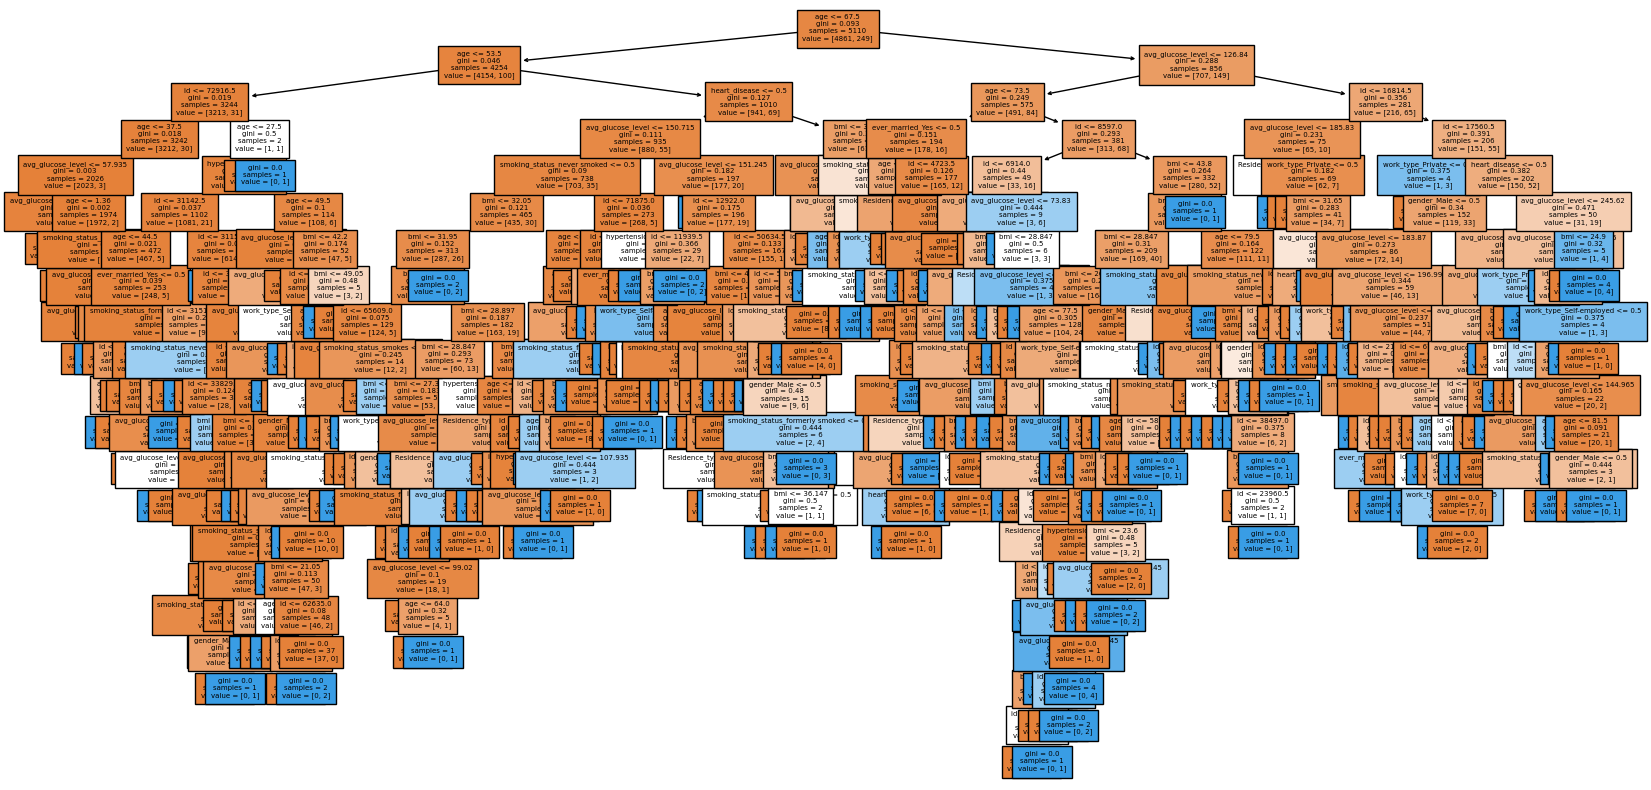

In [20]:
#Entrenamos nuestro modelo y mostramos los diferentes camino que recorrio al momento del entrenamiento
plt.figure( figsize = (20, 10))
plot_tree( decision_tree = model, feature_names = explicativas.columns, filled = True, fontsize = 5);

In [21]:
#Algunas librerias para poder exportar nuestro arbol en formato png
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [24]:
#Creamo la imagen de nuestro arbol y lo guardamos
out = StringIO()
tree.export_graphviz(model, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('strokes.png')

True

# Calculo de prediccion

In [27]:
#Tomamos nuestro una fila para hacer la prueba
a = explicativas.sample()
a

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
276,45801,38.0,0,0,97.49,26.9,0,0,0,0,1,0,0,0,0,1,0


In [28]:
#mandamos nuestros datos de prueba al modelo para que ralize la predccion correspondiente
model.predict_proba(a)

array([[1., 0.]])

In [30]:
y_pred = model.predict(explicativas)

# Interpretamos el modelo

In [31]:
import seaborn as sns

In [33]:
print(df.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


<Axes: xlabel='hypertension', ylabel='Count'>

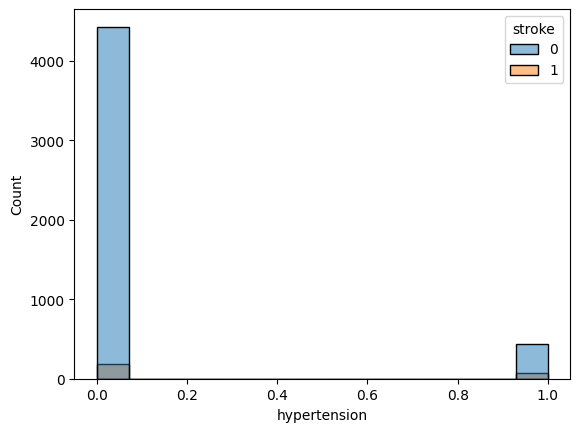

In [34]:
sns.histplot( x = df.hypertension, hue = df.stroke)

In [41]:
#Realizamos pruebas con las 10 primeras filas para ver la presicion de nuestro modelo
df['pred'] = y_pred
df.sample(10)[['stroke', 'pred']]

,stroke,pred
2377,0,0
2422,0,0
131,1,1
2443,0,0
56,1,1
4344,0,0
4248,0,0
3333,0,0
1485,0,0
1134,0,0


In [43]:
#Obtenemos el porcenteje de precicion de nuestro modelo
(df['stroke'] == df['pred']).mean()

1.0

In [44]:
!python --version

Python 3.10.12
